<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/Naive_Bayes_zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [ ]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}


In [6]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

dane_surowe_email = {
    'Slowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Slowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dzis', 'limitowana', 'miesieczny', 'rabat', 'pilne', 'wyjatkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam_Cel': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
                 'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}


df_email = pd.DataFrame(dane_surowe_email)
print("--- RAMKA DANYCH WEJŚCIOWYCH ---")
print(df_email.to_string(index=True))

print("\n===== ZADANIE 1a: RĘCZNE OBLICZENIA NAIVE BAYES =====")

print("\n--- KROK 1: Prawdopodobieństwa A Priori ---")

liczba_wystapien_klas = df_email['Spam_Cel'].value_counts()
suma_próbek = len(df_email)

prawdopodobienstwa_a_priori = liczba_wystapien_klas / suma_próbek

print(f"Liczba próbek 'TAK' (Spam): {liczba_wystapien_klas['TAK']}")
print(f"Liczba próbek 'NIE' (Nie-Spam): {liczba_wystapien_klas['NIE']}")
print(f"Całkowita liczba próbek: {suma_próbek}")
print("---")
print(f"P(Spam_Cel = TAK) = {liczba_wystapien_klas['TAK']}/{suma_próbek} = {prawdopodobienstwa_a_priori['TAK']:.4f}")
print(f"P(Spam_Cel = NIE) = {liczba_wystapien_klas['NIE']}/{suma_próbek} = {prawdopodobienstwa_a_priori['NIE']:.4f}")

print("\n--- KROK 2: Prawdopodobieństwa Warunkowe dla Cech ---")

cechy_predykcyjne = ['Slowo_1', 'Slowo_2', 'Wykrzyknik']
prawdopodobienstwa_warunkowe = {}

for nazwa_cechy in cechy_predykcyjne:
    print(f"\n>>> Analiza cechy: {nazwa_cechy.upper()} <<<")
    prawdopodobienstwa_warunkowe[nazwa_cechy] = {}

    for wartosc_klasy_docelowej in ['TAK', 'NIE']:
        dane_dla_klasy = df_email[df_email['Spam_Cel'] == wartosc_klasy_docelowej]
        liczba_dla_klasy = len(dane_dla_klasy)

        print(f"  Dla klasy '{wartosc_klasy_docelowej}' ({liczba_dla_klasy} rekordów):")

        prawdopodobienstwa_warunkowe[nazwa_cechy][wartosc_klasy_docelowej] = {}
        liczba_wystapien_wartosci_cechy = dane_dla_klasy[nazwa_cechy].value_counts()

        for kategoria_cechy in df_email[nazwa_cechy].unique():
            liczba_kategorii = liczba_wystapien_wartosci_cechy.get(kategoria_cechy, 0)
            p_warunkowe = liczba_kategorii / liczba_dla_klasy
            prawdopodobienstwa_warunkowe[nazwa_cechy][wartosc_klasy_docelowej][kategoria_cechy] = p_warunkowe

            print(f"    P({nazwa_cechy}='{kategoria_cechy}' | Spam_Cel='{wartosc_klasy_docelowej}') = "
                  f"{liczba_kategorii}/{liczba_dla_klasy} = {p_warunkowe:.3f}")

print("\n--- Podsumowanie Prawdopodobieństw Warunkowych ---")
print("---------------------------------------------------")
for nazwa_cechy in cechy_predykcyjne:
    print(f"\nCECHA: {nazwa_cechy.upper()}")
    print(f"{'Wartość':15s} | P({nazwa_cechy}|TAK) | P({nazwa_cechy}|NIE)")
    print("---------------------------------------------------")

    for wartosc_cechy in df_email[nazwa_cechy].unique():
        p_dla_spam = prawdopodobienstwa_warunkowe[nazwa_cechy]['TAK'].get(wartosc_cechy, 0)
        p_dla_nie_spam = prawdopodobienstwa_warunkowe[nazwa_cechy]['NIE'].get(wartosc_cechy, 0)
        print(f"{wartosc_cechy:15s} | {p_dla_spam:15.3f} | {p_dla_nie_spam:13.3f}")

print("\n--- KROK 3: Predykcja dla nowej wiadomości E-mail ---")

nowa_wiadomosc_do_predykcji = {
    'Slowo_1': 'darmowy',
    'Slowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

print(f"\nNowa wiadomość e-mail (do klasyfikacji):")
for klucz, wartosc in nowa_wiadomosc_do_predykcji.items():
    print(f"  - {klucz}: '{wartosc}'")

wyniki_dla_klas = {}

print("\n>>> Obliczenia dla każdej klasy docelowej <<<")
for klasa_docelowa_wartosc in ['TAK', 'NIE']:
    print(f"\nObliczanie dla klasy: '{klasa_docelowa_wartosc}'")

    aktualny_wynik = prawdopodobienstwa_a_priori[klasa_docelowa_wartosc]
    print(f"  1. Prawdopodobieństwo a priori P(Spam_Cel='{klasa_docelowa_wartosc}') = {aktualny_wynik:.4f}")

    krok_obliczeniowy = 2
    for nazwa_cechy, wartosc_cechy_instancji in nowa_wiadomosc_do_predykcji.items():
        p_warunkowe = prawdopodobienstwa_warunkowe[nazwa_cechy][klasa_docelowa_wartosc].get(wartosc_cechy_instancji, 0)
        print(f"  {krok_obliczeniowy}. Prawdopodobieństwo warunkowe P({nazwa_cechy}='{wartosc_cechy_instancji}' | Spam_Cel='{klasa_docelowa_wartosc}') = {p_warunkowe:.4f}")
        aktualny_wynik *= p_warunkowe
        print(f"     -> Wynik po mnożeniu: {aktualny_wynik:.8f}")
        krok_obliczeniowy += 1

    print(f"\n  Końcowy niesnormalizowany wynik dla klasy '{klasa_docelowa_wartosc}': {aktualny_wynik:.8f}")
    wyniki_dla_klas[klasa_docelowa_wartosc] = aktualny_wynik

print("\n--- NORMALIZACJA I OSTATECZNA PREDYKCJA ---")

suma_wynikow = sum(wyniki_dla_klas.values())
print(f"Suma niesnormalizowanych wyników: {wyniki_dla_klas['TAK']:.8f} + {wyniki_dla_klas['NIE']:.8f} = {suma_wynikow:.8f}")

znormalizowane_prawdopodobienstwa = {k: v / suma_wynikow for k, v in wyniki_dla_klas.items()}

print("\nPrawdopodobieństwa Znormalizowane (A Posteriori):")
for klasa_docelowa_wartosc in ['TAK', 'NIE']:
    procent_ufnosci = znormalizowane_prawdopodobienstwa[klasa_docelowa_wartosc] * 100
    print(f"  P(Spam_Cel='{klasa_docelowa_wartosc}' | dane cechy) = {wyniki_dla_klas[klasa_docelowa_wartosc]:.8f} / {suma_wynikow:.8f} = "
          f"{znormalizowane_prawdopodobienstwa[klasa_docelowa_wartosc]:.4f} ({procent_ufnosci:.1f}%) <-")

przewidziana_klasa = max(znormalizowane_prawdopodobienstwa, key=znormalizowane_prawdopodobienstwa.get)
print(f"\n>>> PRZEWIDZIANA KLASA DLA NOWEGO E-MAILA: {przewidziana_klasa} <<<")
print(f"   Poziom ufności predykcji: {znormalizowane_prawdopodobienstwa[przewidziana_klasa]*100:.1f}%")


--- RAMKA DANYCH WEJŚCIOWYCH ---
      Slowo_1     Slowo_2 Wykrzyknik Spam_Cel
0     darmowy     wygrana        TAK      TAK
1     darmowy     wygrana        TAK      TAK
2   spotkanie       jutro        NIE      NIE
3      raport   kwartalny        NIE      NIE
4      oferta   specjalna        TAK      NIE
5     darmowy       rabat        TAK      TAK
6   spotkanie        dzis        NIE      NIE
7      oferta  limitowana        TAK      NIE
8      raport  miesieczny        NIE      NIE
9     darmowy       rabat        TAK      TAK
10  spotkanie       pilne        NIE      NIE
11     oferta   wyjatkowa        TAK      NIE

===== ZADANIE 1a: RĘCZNE OBLICZENIA NAIVE BAYES =====

--- KROK 1: Prawdopodobieństwa A Priori ---
Liczba próbek 'TAK' (Spam): 4
Liczba próbek 'NIE' (Nie-Spam): 8
Całkowita liczba próbek: 12
---
P(Spam_Cel = TAK) = 4/12 = 0.3333
P(Spam_Cel = NIE) = 8/12 = 0.6667

--- KROK 2: Prawdopodobieństwa Warunkowe dla Cech ---

>>> Analiza cechy: SLOWO_1 <<<
  Dla klasy 'TAK' 

In [9]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

dane_spam_sk = {
    'Cecha_Slowo1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                      'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Cecha_Slowo2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                      'dzis', 'limitowana', 'miesieczny', 'rabat', 'pilne', 'wyjatkowa'],
    'Cecha_Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                            'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Cel_Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
                    'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}

df_spam_sk = pd.DataFrame(dane_spam_sk)
print("--- DANE DLA SKLEARN (DataFrame) ---")
print(df_spam_sk.to_string(index=True))

cechy_do_klasyfikacji = ['Cecha_Slowo1', 'Cecha_Slowo2', 'Cecha_Wykrzyknik']
kodery_cech = {}

X_przekształcone = pd.DataFrame()
for nazwa_cechy in cechy_do_klasyfikacji:
    kodery_cech[nazwa_cechy] = LabelEncoder()
    X_przekształcone[nazwa_cechy] = kodery_cech[nazwa_cechy].fit_transform(df_spam_sk[nazwa_cechy])

    print(f"\nZakodowana cecha: {nazwa_cechy}")
    for indeks, etykieta_wartosc in enumerate(kodery_cech[nazwa_cechy].classes_):
        print(f"  '{etykieta_wartosc}' -> {indeks}")

koder_celu = LabelEncoder()
y_przekształcone = koder_celu.fit_transform(df_spam_sk['Cel_Spam'])

print(f"\nZakodowany cel: Cel_Spam")
for indeks, etykieta_wartosc in enumerate(koder_celu.classes_):
    print(f"  '{etykieta_wartosc}' -> {indeks}")

print("\n" + "=" * 60)
print("PRZEKSZTAŁCONA MACIERZ CECH (X):")
print(X_przekształcone.to_string(index=True))
print(f"\nPRZEKSZTAŁCONY WEKTOR CELU (y): {y_przekształcone}")

print("\n===== TRENOWANIE MODELI SKLEARN CATEGORICALNB =====")

model_bez_wygładzania_laplace = CategoricalNB(alpha=0.0)

model_z_wygładzaniem_laplace = CategoricalNB(alpha=1.0)

X_treningowe = X_przekształcone.values
y_treningowe = y_przekształcone

model_bez_wygładzania_laplace.fit(X_treningowe, y_treningowe)
model_z_wygładzaniem_laplace.fit(X_treningowe, y_treningowe)

print("Model CategoricalNB (alpha=0.0) przeszkolony pomyślnie.")
print("Model CategoricalNB (alpha=1.0) przeszkolony pomyślnie.")

print("\n===== PREDYKCJA DLA NOWEJ PRÓBKI E-MAILA =====")

nowa_probka_email_do_analizy = {
    'Cecha_Slowo1': 'darmowy',
    'Cecha_Slowo2': 'wygrana',
    'Cecha_Wykrzyknik': 'TAK'
}

print(f"\nNowy e-mail do przewidywania:")
for klucz, wartosc in nowa_probka_email_do_analizy.items():
    print(f"  - {klucz}: '{wartosc}'")

zakodowana_nowa_probka = []
for nazwa_cechy in cechy_do_klasyfikacji:
    zakodowana_wartosc = kodery_cech[nazwa_cechy].transform([nowa_probka_email_do_analizy[nazwa_cechy]])[0]
    zakodowana_nowa_probka.append(zakodowana_wartosc)

wejscie_dla_predykcji = np.array([zakodowana_nowa_probka])
print(f"\nZakodowana nowa próbka (numerycznie): {zakodowana_nowa_probka}")

print("\n--- WYNIKI: MODEL SKLEARN BEZ WYGŁADZANIA LAPLACE'A (alpha=0.0) ---")

przewidziana_klasa_bez_wyg = model_bez_wygładzania_laplace.predict(wejscie_dla_predykcji)
etykieta_przewidzianej_klasy_bez_wyg = koder_celu.inverse_transform(przewidziana_klasa_bez_wyg)[0]

prawdopodobienstwa_bez_wyg = model_bez_wygładzania_laplace.predict_proba(wejscie_dla_predykcji)[0]

print(f"\nPrawdopodobieństwa dla klas:")
for i, etykieta_klasy in enumerate(koder_celu.classes_):
    print(f"  P(Cel_Spam='{etykieta_klasy}' | cechy) = {prawdopodobienstwa_bez_wyg[i]:.4f} ({prawdopodobienstwa_bez_wyg[i]*100:.2f}%)")

print(f"\nOstateczna predykcja: Cel_Spam = {etykieta_przewidzianej_klasy_bez_wyg}")

print("\n--- WYNIKI: MODEL SKLEARN Z WYGŁADZANIEM LAPLACE'A (alpha=1.0) ---")

przewidziana_klasa_z_wyg = model_z_wygładzaniem_laplace.predict(wejscie_dla_predykcji)
etykieta_przewidzianej_klasy_z_wyg = koder_celu.inverse_transform(przewidziana_klasa_z_wyg)[0]

prawdopodobienstwa_z_wyg = model_z_wygładzaniem_laplace.predict_proba(wejscie_dla_predykcji)[0]

print(f"\nPrawdopodobieństwa dla klas:")
for i, etykieta_klasy in enumerate(koder_celu.classes_):
    print(f"  P(Cel_Spam='{etykieta_klasy}' | cechy) = {prawdopodobienstwa_z_wyg[i]:.4f} ({prawdopodobienstwa_z_wyg[i]*100:.2f}%)")

print(f"\nOstateczna predykcja: Cel_Spam = {etykieta_przewidzianej_klasy_z_wyg}")

print("\n===== PORÓWNANIE Z OBLICZENIAMI RĘCZNYMI I WYJAŚNIENIE =====")

print("\nTabela Porównawcza Wyników:")
print("  Metoda                             | P(Spam=TAK) | P(Spam=NIE) | Przewidziana Klasa")
print("-----------------------------------------------------------------------------------")
print("  Ręczne (bez wygładzania)          |   100.00%   |    0.00%    |       TAK        ")

indeks_tak = np.where(koder_celu.classes_ == 'TAK')[0][0]
indeks_nie = np.where(koder_celu.classes_ == 'NIE')[0][0]

p_tak_z_wyg = prawdopodobienstwa_z_wyg[indeks_tak]
p_nie_z_wyg = prawdopodobienstwa_z_wyg[indeks_nie]
print(f"  Sklearn (alpha=1.0, Laplace)       |   {p_tak_z_wyg*100:.2f}%   |    {p_nie_z_wyg*100:.2f}%    |       {etykieta_przewidzianej_klasy_z_wyg}        ")

p_tak_bez_wyg = prawdopodobienstwa_bez_wyg[indeks_tak]
p_nie_bez_wyg = prawdopodobienstwa_bez_wyg[indeks_nie]
print(f"  Sklearn (alpha=0.0, bez wygładzania) |   {p_tak_bez_wyg*100:.2f}%   |    {p_nie_bez_wyg*100:.2f}%    |       {etykieta_przewidzianej_klasy_bez_wyg}        ")

print("\nWyjaśnienie Różnic:")
print("Główna różnica wynika z zastosowania wygładzania Laplace'a (parametru `alpha`) w implementacji `CategoricalNB` w sklearn.")
print("\nObliczenia ręczne (oraz model sklearn z `alpha=0.0`) dają 0% prawdopodobieństwa dla klasy 'NIE' (nie-spam),")
print("ponieważ w danych treningowych nie ma żadnej próbki nie-spam, która jednocześnie zawierałaby cechy 'darmowy' i 'wygrana'.")
print("Mnożenie przez zero powoduje, że całe prawdopodobieństwo a posteriori dla tej klasy staje się zerowe.")

print("\nWygładzanie Laplace'a (`alpha=1.0`) rozwiązuje ten problem 'zerowej częstości' poprzez dodanie pseudoliczby do każdego zliczenia kategorii.")

--- DANE DLA SKLEARN (DataFrame) ---
   Cecha_Slowo1 Cecha_Slowo2 Cecha_Wykrzyknik Cel_Spam
0       darmowy      wygrana              TAK      TAK
1       darmowy      wygrana              TAK      TAK
2     spotkanie        jutro              NIE      NIE
3        raport    kwartalny              NIE      NIE
4        oferta    specjalna              TAK      NIE
5       darmowy        rabat              TAK      TAK
6     spotkanie         dzis              NIE      NIE
7        oferta   limitowana              TAK      NIE
8        raport   miesieczny              NIE      NIE
9       darmowy        rabat              TAK      TAK
10    spotkanie        pilne              NIE      NIE
11       oferta    wyjatkowa              TAK      NIE

Zakodowana cecha: Cecha_Slowo1
  'darmowy' -> 0
  'oferta' -> 1
  'raport' -> 2
  'spotkanie' -> 3

Zakodowana cecha: Cecha_Slowo2
  'dzis' -> 0
  'jutro' -> 1
  'kwartalny' -> 2
  'limitowana' -> 3
  'miesieczny' -> 4
  'pilne' -> 5
  'rabat' -> 

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:1528: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

In [ ]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)

--- RAMKA DANYCH WEJŚCIOWYCH (DIAGNOZA GRYPY) ---
       Gorączka Kaszel    Zmęczenie Grypa
0        wysoka    TAK         duże   TAK
1        wysoka    TAK         duże   TAK
2         niska    NIE         małe   NIE
3        wysoka    TAK         duże   TAK
4         niska    NIE         małe   NIE
5        wysoka    TAK         duże   TAK
6         niska    NIE         małe   NIE
7        wysoka    TAK  umiarkowane   TAK
8   umiarkowana    TAK         duże   TAK
9        wysoka    NIE         małe   NIE
10        niska    NIE         małe   NIE
11  umiarkowana    TAK  umiarkowane   NIE
12       wysoka    TAK         duże   TAK
13        niska    NIE         małe   NIE
14  umiarkowana    TAK         duże   TAK

===== ZADANIE 2a: ANALIZA DANYCH =====

--- 1. Liczba przypadków grypy ---
Przypadki grypy (Grypa='TAK'): 8
Przypadki bez grypy (Grypa='NIE'): 7
Całkowita liczba pacjentów: 15

--- 2. Analiza cech wskazujących na grypę (Prawdopodobieństwa warunkowe) ---

>>> CECHA: GORĄCZKA <<

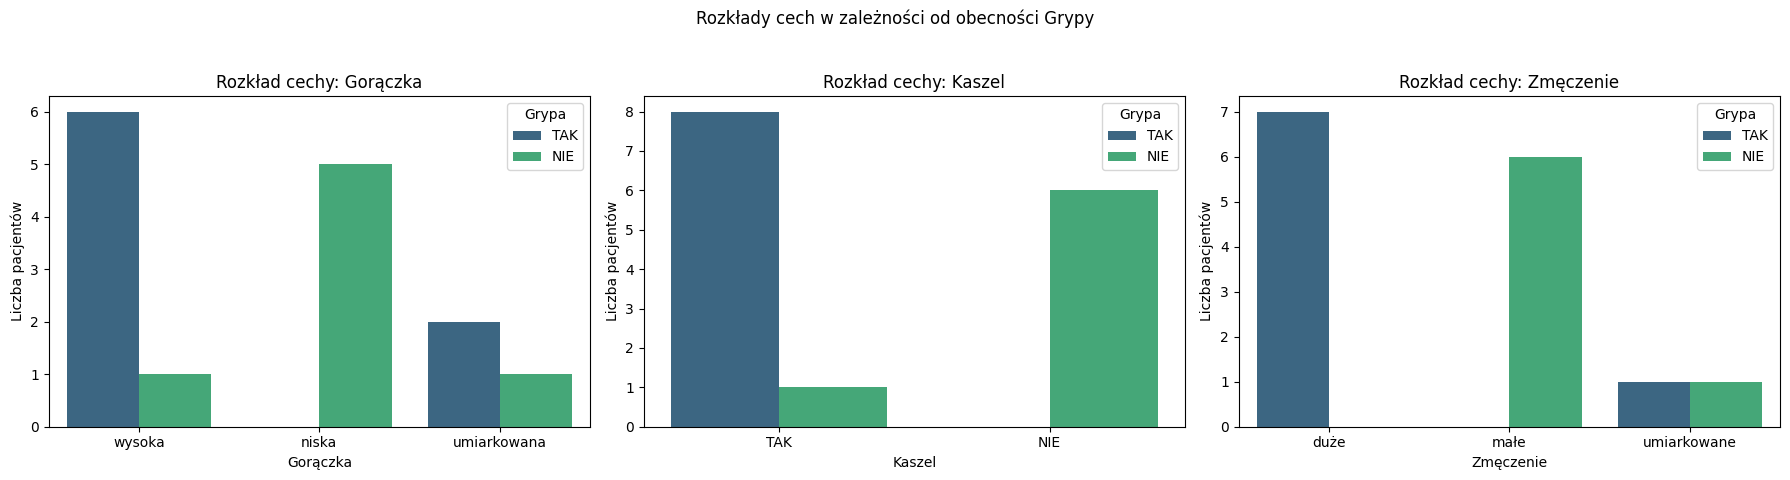


===== ZADANIE 2b: PREDYKCJA DLA 3 PACJENTÓW (Naive Bayes) =====

P(Grypa='TAK') = 0.533
P(Grypa='NIE') = 0.467

--- Predykcje dla poszczególnych pacjentów ---

>>> Pacjent A:
  Objawy: {'Gorączka': 'wysoka', 'Kaszel': 'TAK', 'Zmęczenie': 'duże'}
  Prawdopodobieństwa A Posteriori:
    P(Grypa='TAK' | objawy) = 1.0000 (100.0%) <-
    P(Grypa='NIE' | objawy) = 0.0000 (0.0%) <-
  PRZEWIDZIANA KLASA: TAK

>>> Pacjent B:
  Objawy: {'Gorączka': 'niska', 'Kaszel': 'NIE', 'Zmęczenie': 'małe'}
  Prawdopodobieństwa A Posteriori:
    P(Grypa='TAK' | objawy) = 0.0000 (0.0%) <-
    P(Grypa='NIE' | objawy) = 1.0000 (100.0%) <-
  PRZEWIDZIANA KLASA: NIE

>>> Pacjent C:
  Objawy: {'Gorączka': 'umiarkowana', 'Kaszel': 'TAK', 'Zmęczenie': 'umiarkowane'}
  Prawdopodobieństwa A Posteriori:
    P(Grypa='TAK' | objawy) = 0.9245 (92.5%) <-
    P(Grypa='NIE' | objawy) = 0.0755 (7.5%) <-
  PRZEWIDZIANA KLASA: TAK


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)

print("--- RAMKA DANYCH WEJŚCIOWYCH (DIAGNOZA GRYPY) ---")
print(df_grypa.to_string(index=True))

print("\n===== ZADANIE 2a: ANALIZA DANYCH =====")

print("\n--- 1. Liczba przypadków grypy ---")
liczba_grypa_tak = df_grypa[df_grypa['Grypa'] == 'TAK'].shape[0]
liczba_grypa_nie = df_grypa[df_grypa['Grypa'] == 'NIE'].shape[0]

print(f"Przypadki grypy (Grypa='TAK'): {liczba_grypa_tak}")
print(f"Przypadki bez grypy (Grypa='NIE'): {liczba_grypa_nie}")
print(f"Całkowita liczba pacjentów: {len(df_grypa)}")

print("\n--- 2. Analiza cech wskazujących na grypę (Prawdopodobieństwa warunkowe) ---")
cechy_objawowe = ['Gorączka', 'Kaszel', 'Zmęczenie']
prawdopodobienstwa_warunkowe_grypa = {}

for cecha in cechy_objawowe:
    print(f"\n>>> CECHA: {cecha.upper()} <<<")
    prawdopodobienstwa_warunkowe_grypa[cecha] = {}

    df_grypa_tak = df_grypa[df_grypa['Grypa'] == 'TAK']
    liczba_grypa_tak_cecha = len(df_grypa_tak)
    print(f"  Dla Grypa='TAK' ({liczba_grypa_tak_cecha} przypadków):")
    prawdopodobienstwa_warunkowe_grypa[cecha]['TAK'] = {}
    counts_tak = df_grypa_tak[cecha].value_counts()
    for wartosc in df_grypa[cecha].unique():
        p_wartosc_tak = counts_tak.get(wartosc, 0) / liczba_grypa_tak_cecha
        prawdopodobienstwa_warunkowe_grypa[cecha]['TAK'][wartosc] = p_wartosc_tak
        print(f"    P({cecha}='{wartosc}' | Grypa='TAK') = {p_wartosc_tak:.3f}")

    df_grypa_nie = df_grypa[df_grypa['Grypa'] == 'NIE']
    liczba_grypa_nie_cecha = len(df_grypa_nie)
    print(f"  Dla Grypa='NIE' ({liczba_grypa_nie_cecha} przypadków):")
    prawdopodobienstwa_warunkowe_grypa[cecha]['NIE'] = {}
    counts_nie = df_grypa_nie[cecha].value_counts()
    for wartosc in df_grypa[cecha].unique():
        p_wartosc_nie = counts_nie.get(wartosc, 0) / liczba_grypa_nie_cecha
        prawdopodobienstwa_warunkowe_grypa[cecha]['NIE'][wartosc] = p_wartosc_nie
        print(f"    P({cecha}='{wartosc}' | Grypa='NIE') = {p_wartosc_nie:.3f}")

print("\n--- Podsumowanie różnic w prawdopodobieństwach warunkowych (wyższa różnica = silniejszy wskaźnik) ---")
print(f"{'Cecha':15s} | {'Wartość':15s} | {'P(W|TAK)':>10s} | {'P(W|NIE)':>10s} | {'|P(W|TAK)-P(W|NIE)|':>20s}")
print("-" * 80)

sily_wskaznikow = {}
for cecha in cechy_objawowe:
    sily_wskaznikow[cecha] = 0
    for wartosc in df_grypa[cecha].unique():
        p_tak = prawdopodobienstwa_warunkowe_grypa[cecha]['TAK'].get(wartosc, 0)
        p_nie = prawdopodobienstwa_warunkowe_grypa[cecha]['NIE'].get(wartosc, 0)
        roznica = abs(p_tak - p_nie)
        sily_wskaznikow[cecha] += roznica
        print(f"{cecha:15s} | {wartosc:15s} | {p_tak:10.3f} | {p_nie:10.3f} | {roznica:20.3f}")

most_indicative_feature = max(sily_wskaznikow, key=sily_wskaznikow.get)
print(f"\nCecha, która najbardziej 'wskazuje' na grypę (sumaryczna różnica w P(cecha|TAK) vs P(cecha|NIE)): '{most_indicative_feature}'")

print("\n--- 3. Wizualizacja rozkładów cech ---")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Rozkłady cech w zależności od obecności Grypy')

for i, cecha in enumerate(cechy_objawowe):
    sns.countplot(data=df_grypa, x=cecha, hue='Grypa', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Rozkład cechy: {cecha}')
    axes[i].set_xlabel(cecha)
    axes[i].set_ylabel('Liczba pacjentów')
    axes[i].legend(title='Grypa')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n===== ZADANIE 2b: PREDYKCJA DLA 3 PACJENTÓW (Naive Bayes) =====")

prawdopodobienstwa_a_priori_grypa = df_grypa['Grypa'].value_counts(normalize=True)
print(f"\nP(Grypa='TAK') = {prawdopodobienstwa_a_priori_grypa['TAK']:.3f}")
print(f"P(Grypa='NIE') = {prawdopodobienstwa_a_priori_grypa['NIE']:.3f}")

pacjenci_do_predykcji = {
    'Pacjent A': {'Gorączka': 'wysoka', 'Kaszel': 'TAK', 'Zmęczenie': 'duże'},
    'Pacjent B': {'Gorączka': 'niska', 'Kaszel': 'NIE', 'Zmęczenie': 'małe'},
    'Pacjent C': {'Gorączka': 'umiarkowana', 'Kaszel': 'TAK', 'Zmęczenie': 'umiarkowane'}
}

def przewiduj_grype_nb(pacjent_dane):
    wyniki_dla_klas = {}
    for klasa_grypy in ['TAK', 'NIE']:
        aktualny_wynik = prawdopodobienstwa_a_priori_grypa[klasa_grypy]

        for cecha, wartosc_cechy in pacjent_dane.items():

            p_warunkowe = prawdopodobienstwa_warunkowe_grypa[cecha][klasa_grypy].get(wartosc_cechy, 0)
            aktualny_wynik *= p_warunkowe

        wyniki_dla_klas[klasa_grypy] = aktualny_wynik

    suma_wynikow = sum(wyniki_dla_klas.values())

    if suma_wynikow == 0:
        znormalizowane_prawdopodobienstwa = {'TAK': 0.0, 'NIE': 0.0}
        przewidziana_klasa = 'Nieokreślona'
    else:
        znormalizowane_prawdopodobienstwa = {k: v / suma_wynikow for k, v in wyniki_dla_klas.items()}
        przewidziana_klasa = max(znormalizowane_prawdopodobienstwa, key=znormalizowane_prawdopodobienstwa.get)

    return znormalizowane_prawdopodobienstwa, przewidziana_klasa

print("\n--- Predykcje dla poszczególnych pacjentów ---")
for nazwa_pacjenta, dane_pacjenta in pacjenci_do_predykcji.items():
    print(f"\n>>> {nazwa_pacjenta}:")
    print(f"  Objawy: {dane_pacjenta}")
    p_znormalizowane, klasa_predykowana = przewiduj_grype_nb(dane_pacjenta)

    print("  Prawdopodobieństwa A Posteriori:")
    for klasa, prob in p_znormalizowane.items():
        print(f"    P(Grypa='{klasa}' | objawy) = {prob:.4f} ({prob*100:.1f}%) <-")
    print(f"  PRZEWIDZIANA KLASA: {klasa_predykowana}")